In [1]:
import numpy as np
import types
import collections
from random import shuffle
import PIL
from PIL import Image
import cupy as cp
from timeit import default_timer as timer
from matplotlib.pyplot import imshow
import cv2
import os
from tqdm.notebook import trange, tqdm
%matplotlib inline

In [14]:
file = "/tmp/test.jpeg"

In [33]:
import torchvision.transforms as transforms
import torchvision.transforms.functional as fc
t1 = transforms.Compose([
            transforms.RandomResizedCrop(224),
            transforms.RandomHorizontalFlip()
        ])
t2 = transforms.Compose([
            transforms.RandomResizedCrop(224),
            transforms.RandomHorizontalFlip(),
            transforms.ToTensor()
        ])
normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                     std=[0.229, 0.224, 0.225])
t3 = transforms.Compose([
            transforms.RandomResizedCrop(224),
            transforms.RandomHorizontalFlip(),
            transforms.ToTensor(),
            normalize
        ])


In [15]:
img = Image.open(file)# 读取图像

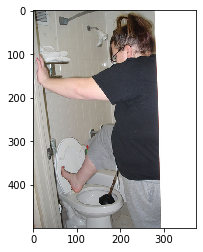

In [16]:
imshow(img)

In [7]:
tensor1 = t1(img)

In [8]:
tensor2 = t2(img)

In [9]:
tensor3 = t3(img)

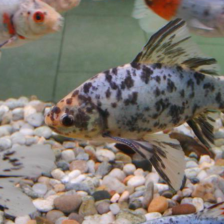

In [10]:
tensor1

In [11]:
tensor2

tensor([[[0.4275, 0.4275, 0.4275,  ..., 0.4196, 0.4157, 0.4196],
         [0.4078, 0.4078, 0.4157,  ..., 0.4157, 0.4235, 0.4275],
         [0.3961, 0.3961, 0.4078,  ..., 0.4157, 0.4196, 0.4235],
         ...,
         [0.7373, 0.7373, 0.7412,  ..., 0.6235, 0.6196, 0.6157],
         [0.7725, 0.7725, 0.7529,  ..., 0.6196, 0.6196, 0.6196],
         [0.7529, 0.7451, 0.7529,  ..., 0.6118, 0.6118, 0.6157]],

        [[0.4863, 0.4824, 0.4824,  ..., 0.5333, 0.5294, 0.5333],
         [0.4824, 0.4784, 0.4824,  ..., 0.5294, 0.5373, 0.5412],
         [0.4824, 0.4784, 0.4784,  ..., 0.5294, 0.5333, 0.5373],
         ...,
         [0.7098, 0.7176, 0.7255,  ..., 0.5882, 0.5804, 0.5725],
         [0.7412, 0.7490, 0.7333,  ..., 0.5804, 0.5804, 0.5765],
         [0.7176, 0.7216, 0.7333,  ..., 0.5725, 0.5765, 0.5725]],

        [[0.4157, 0.4118, 0.4118,  ..., 0.4157, 0.4118, 0.4157],
         [0.4196, 0.4196, 0.4235,  ..., 0.4118, 0.4196, 0.4235],
         [0.4275, 0.4275, 0.4275,  ..., 0.4118, 0.4157, 0.

In [12]:
tensor3

tensor([[[-1.1247, -0.6965, -0.2684,  ..., -0.3541, -0.3712, -0.3369],
         [-1.2274, -0.7650, -0.3198,  ..., -0.4911, -0.4739, -0.4054],
         [-1.1075, -0.6452, -0.1828,  ..., -0.8507, -0.7650, -0.6965],
         ...,
         [ 0.8618,  0.8618,  0.8447,  ..., -0.3198, -0.2171, -0.2171],
         [ 0.8961,  0.8961,  0.8789,  ..., -0.2684, -0.1657, -0.1143],
         [ 0.9132,  0.9132,  0.8961,  ..., -0.2684, -0.2342, -0.0801]],

        [[-1.3179, -1.3354, -1.2654,  ..., -0.3025, -0.3200, -0.2850],
         [-1.4755, -1.4405, -1.3179,  ..., -0.4251, -0.4251, -0.3550],
         [-1.6331, -1.5455, -1.4230,  ..., -0.7927, -0.7227, -0.6527],
         ...,
         [ 0.9405,  0.9405,  0.9230,  ..., -0.3200, -0.2150, -0.1975],
         [ 0.9755,  0.9755,  0.9580,  ..., -0.2850, -0.1800, -0.0924],
         [ 0.9930,  0.9930,  0.9755,  ..., -0.2850, -0.2325, -0.0924]],

        [[-1.5081, -1.6650, -1.6476,  ..., -0.1312, -0.1487, -0.1138],
         [-1.5779, -1.7173, -1.6999,  ..., -0

In [17]:
import sys

In [20]:
print("tensor1 size: {}".format(sys.getsizeof(tensor1.tobytes())))

tensor1 size: 150561


In [21]:
print("tensor2 size: {}".format(tensor2.element_size() * tensor2.nelement()))

tensor2 size: 602112


In [22]:
print("tensor3 size: {}".format(tensor2.element_size() * tensor2.nelement()))

tensor3 size: 602112


In [5]:
602112/150561.

3.9991232789367763

500 375
(500, 375, 3)


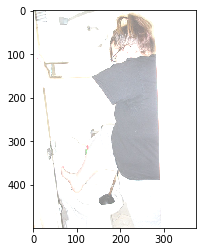

In [46]:
def showImageFromRaw(fname):
    with open(fname, 'r') as f:
        lines = f.readlines()
    height = int(lines[0])
    width = int(lines[1])
    print(height, width)
    raw = []
    for i in lines[2:]:
        sp = i.rstrip().split(" ")
        r,g,b = sp[0],sp[1],sp[2]
        raw.append([r,g,b])
    raw = np.asarray(raw, dtype=np.uint8)
    raw = raw.reshape(height, width, 3)
    print(raw.shape)
    return raw
# r = showImageFromRaw("/tmp/out2.bin")
r2 = showImageFromRaw("/tmp/out.bin")
imshow(r2)

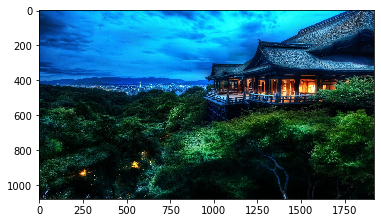

In [19]:
imshow(np.asarray(Image.open("../../jpeg_tutorial/data/house.jpg")))

In [24]:


print(r.shape)
r

(504, 376, 3)


array([[[146, 140, 140],
        [144, 145, 138],
        [131, 139, 127],
        ...,
        [161, 162, 156],
        [161, 162, 156],
        [161, 162, 157]],

       [[157, 158, 152],
        [160, 161, 155],
        [161, 162, 155],
        ...,
        [152, 151, 144],
        [153, 152, 145],
        [160, 160, 153]],

       [[154, 153, 146],
        [154, 153, 146],
        [154, 154, 146],
        ...,
        [151, 145, 137],
        [150, 146, 137],
        [149, 145, 136]],

       ...,

       [[117, 115, 110],
        [114, 113, 109],
        [120, 119, 118],
        ...,
        [127, 133, 143],
        [129, 134, 146],
        [133, 137, 149]],

       [[140, 145, 156],
        [139, 145, 155],
        [133, 140, 149],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [25]:
r2

array([[[146, 140, 140],
        [144, 145, 138],
        [131, 139, 127],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[146, 140, 138],
        [143, 145, 137],
        [136, 143, 132],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[147, 141, 139],
        [145, 147, 139],
        [141, 148, 137],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[144,  98,  61],
        [134,  91,  41],
        [137,  95,  48],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[141,  93,  57],
        [141,  96,  46],
        [149, 105,  57],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[138,  88,  53],
        [150, 103,  53],
        [162, 117,  67],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [15]:
imgarray = np.asarray(img)

In [16]:
imgarray.shape

(500, 375, 3)

In [17]:
imgarray

array([[[146, 140, 140],
        [144, 145, 139],
        [131, 139, 126],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[146, 141, 138],
        [143, 144, 136],
        [136, 144, 133],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[147, 142, 139],
        [145, 146, 138],
        [141, 149, 138],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[143,  97,  61],
        [134,  90,  41],
        [137,  94,  49],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[141,  93,  57],
        [141,  95,  45],
        [149, 105,  56],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[138,  88,  53],
        [151, 103,  54],
        [163, 117,  67],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [8]:
ROOT_DIR="/mnt/optane-ssd/lipeng/imagenet/"
def get_filenames():
    with open("/mnt/optane-ssd/lipeng/imagenet/train.txt", 'r') as f:
        lines = f.readlines()
    fnames = []
    for l in lines:
        fnames.append(l.strip().split()[0])
    return fnames

fnames = get_filenames()

In [9]:
fnames[:10]

['train/n01688243/n01688243_11073.JPEG',
 'train/n01688243/n01688243_2174.JPEG',
 'train/n01688243/n01688243_11682.JPEG',
 'train/n01688243/n01688243_318.JPEG',
 'train/n01688243/n01688243_6050.JPEG',
 'train/n01688243/n01688243_10694.JPEG',
 'train/n01688243/n01688243_2954.JPEG',
 'train/n01688243/n01688243_4229.JPEG',
 'train/n01688243/n01688243_2170.JPEG',
 'train/n01688243/n01688243_433.JPEG']

In [21]:
import subprocess
def get_blocks(fname):
    result = subprocess.run(
                    ['/home/lwangay/workspace/FastGC-icecake/scripts/get_block_offset', fname, "/home/lwangay/workspace/FastGC-icecake/scripts/image_block_stat.txt"], stdout=subprocess.PIPE)
    print(result)

get_blocks(ROOT_DIR+fnames[0])

CompletedProcess(args=['/home/lwangay/workspace/FastGC-icecake/scripts/get_block_offset', '/mnt/optane-ssd/lipeng/imagenet/train/n01688243/n01688243_11073.JPEG', '/home/lwangay/workspace/FastGC-icecake/scripts/image_block_stat.txt'], returncode=0, stdout=b'[2020-04-27 20:24:23.433] [info] start of image, offset: 1\n[2020-04-27 20:24:23.433] [info] APP0, JFIF mark, offset: 3\n[2020-04-27 20:24:23.433] [info] App0:\n[2020-04-27 20:24:23.433] [info] \tmajor_version: 1, minor_version: 1\n[2020-04-27 20:24:23.433] [info] \tidentifier: 74 70 73 70 0\n[2020-04-27 20:24:23.433] [info] \tunits: 1, x_density: 72, y_density: 72, x_thumbnail: 0, y_thumbnail: 0\n[2020-04-27 20:24:23.433] [info] DQT, offset: 21\n[2020-04-27 20:24:23.433] [info] DQT length: 67\nDQT table 0, precision 0\n3.00 2.00 2.00 3.00 2.00 2.00 3.00 3.00 \n3.00 3.00 4.00 3.00 3.00 4.00 5.00 8.00 \n5.00 5.00 4.00 4.00 5.00 10.00 7.00 7.00 \n6.00 8.00 12.00 10.00 12.00 12.00 11.00 10.00 \n11.00 11.00 13.00 14.00 18.00 16.00 13.00 

In [22]:
import random
random.shuffle(fnames)

In [23]:
for f in fnames[:20]:
    get_blocks(ROOT_DIR+f)

ision: 8, height: 496, width: 500\nhorizontal_sampling: 1, vertical_sampling: 1, quant_table_id: 0\nhorizontal_sampling: 1, vertical_sampling: 1, quant_table_id: 1\nhorizontal_sampling: 1, vertical_sampling: 1, quant_table_id: 1\n[2020-04-27 20:26:47.927] [info] max horizontal sampling: 1, max vertical sampling: 1\n[2020-04-27 20:26:47.927] [info] DHT, offset: 178\n[2020-04-27 20:26:47.927] [info] DHT length: 28\ntable type: DC, id: 0\n0 2 2 3 1 1 0 0 0 0 0 0 0 0 0 0 \nlen: 2\t0000000000000000\n 0X02\nlen: 2\t0000000000000001\n 0X03\nlen: 3\t0000000000000100\n 0X01\nlen: 3\t0000000000000101\n 0X04\nlen: 4\t0000000000001100\n 0000\nlen: 4\t0000000000001101\n 0X05\nlen: 4\t0000000000001110\n 0X06\nlen: 5\t0000000000011110\n 0X07\nlen: 6\t0000000000111110\n 0X08\n[2020-04-27 20:26:47.927] [info] DHT, offset: 208\n[2020-04-27 20:26:47.927] [info] DHT length: 67\ntable type: AC, id: 0\n0 2 1 3 3 2 4 4 3 7 3 3 3 4 1 5 \nlen: 2\t0000000000000000\n 0X01\nlen: 2\t0000000000000001\n 0X02\nlen: 3

In [26]:
with open('image_block_stat.txt', 'r') as f:
    lines = f.readlines()
lines[:10]

['==========\n',
 '/mnt/optane-ssd/lipeng/imagenet/train/n01688243/n01688243_11073.JPEG\n',
 'block: 0, dc: 366 0, ac: 368 2\n',
 'block: 1, dc: 391 6, ac: 392 2\n',
 'block: 2, dc: 418 5, ac: 419 4\n',
 'block: 3, dc: 442 2, ac: 443 2\n',
 'block: 4, dc: 465 8, ac: 467 3\n',
 'block: 5, dc: 470 6, ac: 471 3\n',
 'block: 6, dc: 472 5, ac: 473 4\n',
 'block: 7, dc: 497 8, ac: 498 7\n']

In [41]:
image_stat = []
block_diff = []
count = -1
for l in lines:
    if l.startswith('==='):
        count +=1
        image_stat.append([])
        block_diff.append([])
        continue
    if l.startswith("/mnt"):
        continue
    if(l.startswith("\n")):
        continue
    units= l.rstrip().split(" ")
    # print(units)
    dc_off = int(units[3])*8 + int(units[4][:-1])
    ac_off = int(units[6])*8 + int(units[7])
    # print(dc_off, ac_off)
    # break
    image_stat[count].append({'dc':dc_off, 'ac':ac_off})
    if len(image_stat[count]) > 1:
        block_diff[count].append(image_stat[count][-1]['dc'] - image_stat[count][-2]['dc'])

No handles with labels found to put in legend.


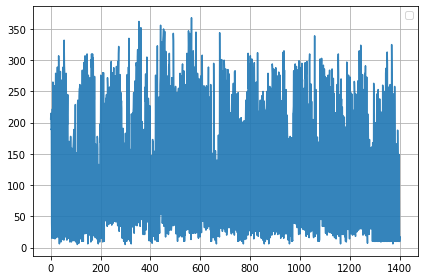

In [49]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
length=6
width = 4
plt.figure(figsize=(length,4))
ax = plt.subplot(111)
linestyles=['-','o-','v-','-s', 'p-','*-','d-','x','D','d','|','--','-.','.-',',-', '-o']
linelables = ['1']
node_list = [32, 64, 96, 128, 160]

#x-axis间距
# ax.xaxis.set_major_locator(MultipleLocator(5))
xs = np.arange(0, len(block_diff[0]), 1)
ax.plot(xs, block_diff[0],linestyles[0], linewidth=1.5, color='C'+str(0), alpha=0.9)
ax.legend(loc=0)
# ax.set_title('(b) rgg')
ax.grid(True)
# plt.locator_params(axis='x', nbins=15)
plt.tight_layout()
plt.show()

No handles with labels found to put in legend.


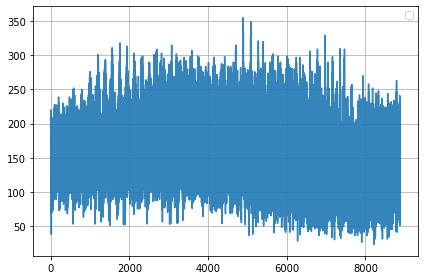

In [50]:
length=6
width = 4
plt.figure(figsize=(length,4))
ax = plt.subplot(111)
linestyles=['-','o-','v-','-s', 'p-','*-','d-','x','D','d','|','--','-.','.-',',-', '-o']
linelables = ['1']
node_list = [32, 64, 96, 128, 160]
idx = 1
#x-axis间距
# ax.xaxis.set_major_locator(MultipleLocator(5))
xs = np.arange(0, len(block_diff[idx]), 1)
ax.plot(xs, block_diff[idx],linestyles[0], linewidth=1.5, color='C'+str(0), alpha=0.9)
ax.legend(loc=0)
# ax.set_title('(b) rgg')
ax.grid(True)
# plt.locator_params(axis='x', nbins=15)
plt.tight_layout()
plt.show()

No handles with labels found to put in legend.


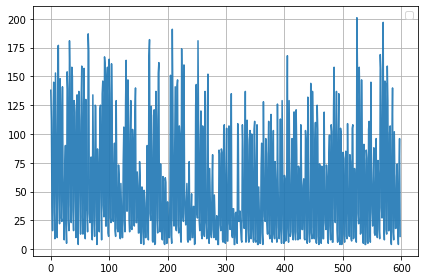

In [51]:
length=6
width = 4
plt.figure(figsize=(length,4))
ax = plt.subplot(111)
linestyles=['-','o-','v-','-s', 'p-','*-','d-','x','D','d','|','--','-.','.-',',-', '-o']
linelables = ['1']
node_list = [32, 64, 96, 128, 160]
idx = 2
#x-axis间距
# ax.xaxis.set_major_locator(MultipleLocator(5))
xs = np.arange(0, len(block_diff[idx]), 1)
ax.plot(xs, block_diff[idx],linestyles[0], linewidth=1.5, color='C'+str(0), alpha=0.9)
ax.legend(loc=0)
# ax.set_title('(b) rgg')
ax.grid(True)
# plt.locator_params(axis='x', nbins=15)
plt.tight_layout()
plt.show()

No handles with labels found to put in legend.


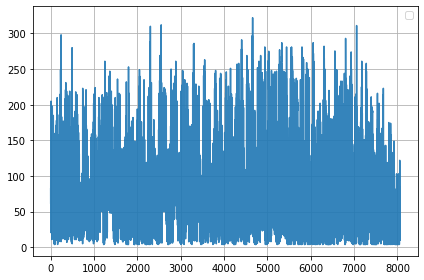

In [53]:
length=6
width = 4
plt.figure(figsize=(length,4))
ax = plt.subplot(111)
linestyles=['-','o-','v-','-s', 'p-','*-','d-','x','D','d','|','--','-.','.-',',-', '-o']
linelables = ['1']
node_list = [32, 64, 96, 128, 160]
idx = 3
#x-axis间距
# ax.xaxis.set_major_locator(MultipleLocator(5))
xs = np.arange(0, len(block_diff[idx]), 1)
ax.plot(xs, block_diff[idx],linestyles[0], linewidth=1.5, color='C'+str(0), alpha=0.9)
ax.legend(loc=0)
# ax.set_title('(b) rgg')
ax.grid(True)
# plt.locator_params(axis='x', nbins=15)
plt.tight_layout()
plt.show()

No handles with labels found to put in legend.


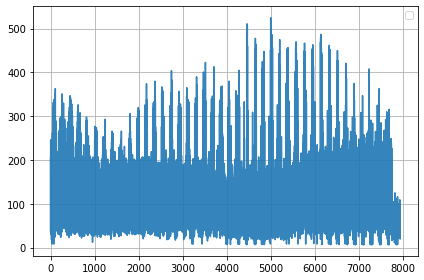

In [54]:
length=6
width = 4
plt.figure(figsize=(length,4))
ax = plt.subplot(111)
linestyles=['-','o-','v-','-s', 'p-','*-','d-','x','D','d','|','--','-.','.-',',-', '-o']
linelables = ['1']
node_list = [32, 64, 96, 128, 160]
idx = 4
#x-axis间距
# ax.xaxis.set_major_locator(MultipleLocator(5))
xs = np.arange(0, len(block_diff[idx]), 1)
ax.plot(xs, block_diff[idx],linestyles[0], linewidth=1.5, color='C'+str(0), alpha=0.9)
ax.legend(loc=0)
# ax.set_title('(b) rgg')
ax.grid(True)
# plt.locator_params(axis='x', nbins=15)
plt.tight_layout()
plt.show()

No handles with labels found to put in legend.


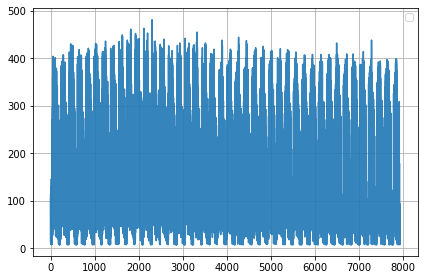

In [55]:
length=6
width = 4
plt.figure(figsize=(length,4))
ax = plt.subplot(111)
linestyles=['-','o-','v-','-s', 'p-','*-','d-','x','D','d','|','--','-.','.-',',-', '-o']
linelables = ['1']
node_list = [32, 64, 96, 128, 160]
idx = 5
#x-axis间距
# ax.xaxis.set_major_locator(MultipleLocator(5))
xs = np.arange(0, len(block_diff[idx]), 1)
ax.plot(xs, block_diff[idx],linestyles[0], linewidth=1.5, color='C'+str(0), alpha=0.9)
ax.legend(loc=0)
# ax.set_title('(b) rgg')
ax.grid(True)
# plt.locator_params(axis='x', nbins=15)
plt.tight_layout()
plt.show()

No handles with labels found to put in legend.


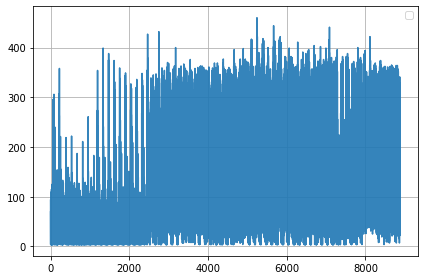

In [56]:
length=6
width = 4
plt.figure(figsize=(length,4))
ax = plt.subplot(111)
linestyles=['-','o-','v-','-s', 'p-','*-','d-','x','D','d','|','--','-.','.-',',-', '-o']
linelables = ['1']
node_list = [32, 64, 96, 128, 160]
idx = 6
#x-axis间距
# ax.xaxis.set_major_locator(MultipleLocator(5))
xs = np.arange(0, len(block_diff[idx]), 1)
ax.plot(xs, block_diff[idx],linestyles[0], linewidth=1.5, color='C'+str(0), alpha=0.9)
ax.legend(loc=0)

# ax.set_title('(b) rgg')
ax.grid(True)
# plt.locator_params(axis='x', nbins=15)
plt.tight_layout()
plt.show()


No handles with labels found to put in legend.


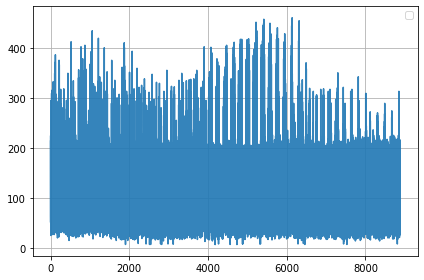

In [57]:
length=6
width = 4
plt.figure(figsize=(length,4))
ax = plt.subplot(111)
linestyles=['-','o-','v-','-s', 'p-','*-','d-','x','D','d','|','--','-.','.-',',-', '-o']
linelables = ['1']
node_list = [32, 64, 96, 128, 160]
idx = 7
#x-axis间距
# ax.xaxis.set_major_locator(MultipleLocator(5))
xs = np.arange(0, len(block_diff[idx]), 1)
ax.plot(xs, block_diff[idx],linestyles[0], linewidth=1.5, color='C'+str(0), alpha=0.9)
ax.legend(loc=0)
# ax.set_title('(b) rgg')
ax.grid(True)
# plt.locator_params(axis='x', nbins=15)
plt.tight_layout()
plt.show()